<a href="https://colab.research.google.com/github/shima-aflatounian/Sentiment_Analysis/blob/main/Git_Neural_Networks_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
#from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
#from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
tweets = pd.read_csv("https://raw.githubusercontent.com/gabriel-david-orozco/Frequency_words_Spark_vs_Sequential_Python/main/Tweets.csv")
tweets.isnull().values.any()
tweets = tweets
#tweets = tweets[ tweets['airline_sentiment'] != "neutral" ]
tweets.shape

(14640, 15)

In [ ]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

<Axes: xlabel='airline_sentiment', ylabel='count'>

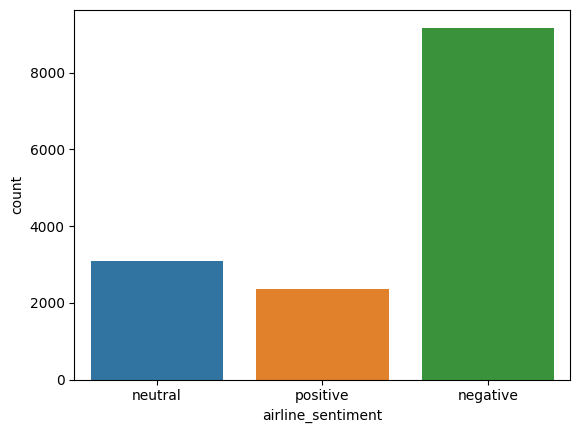

In [ ]:
import seaborn as sns

sns.countplot(x='airline_sentiment', data=tweets)

In [ ]:
# Cleanning Preprocessing
def preprocess_text(sentence):
    # Removing html tags
    #sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(tweets['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[2]

' VirginAmerica didn today Must mean need to take another trip '

In [ ]:
#tagging the sentiment
y = tweets['airline_sentiment']
y = np.array(list(map(lambda x: 0 if x=="negative" else 1 if x=="positive" else 2, y)))

In [ ]:
y[:20]

array([2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
!pip3 install imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)


X = tokenizer.texts_to_sequences(X)

#print(X)
print("you are looking for this:", type(X[1]))
X = np.array(X).reshape(-1,1)
#X, y = oversample.fit_resample(X, y)

y = LabelEncoder().fit_transform(y)

#print(y)
print("this is the Y you are looking for", type(y))

y = np.array(y)

#print(y)
#print("this is the Y you are looking for", type(y))


#print(X)
#print("this is the X you are looking for", type(X))


#print("you are looking for this AGAIN:", X)
#print("you are looking for this:", type(X[1]))

#print("you are looking for this:", type(X[1].tolist()))
X_complete = []
testing = []
for i in X:
  X_complete.append(i.tolist()[0])
  testing.append("holi")
X=X_complete
print(X_complete)

maxlen = 100
print("please", X[1][0])
X = pad_sequences(X, padding='post', maxlen=maxlen)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

0.10.1
you are looking for this: <class 'list'>
this is the Y you are looking for <class 'numpy.ndarray'>
[[77, 47, 215], [77, 525, 3, 87, 1100, 2389, 1, 2, 193], [77, 194, 95, 748, 548, 74, 1, 149, 143, 185], [77, 15, 128, 3535, 1, 4380, 4381, 959, 13, 19, 3001, 3536, 58, 50, 22, 477, 2629], [77, 8, 15, 221, 128, 454, 206, 463, 80, 15], [77, 423, 73, 273, 6, 5, 190, 20, 194, 22, 28, 2006, 15, 128, 2, 111, 206, 463, 80, 120, 1674], [77, 165, 1421, 300, 48, 100, 1349, 28, 4382, 217, 124, 440], [77, 128, 274, 3002, 1675, 5, 3537, 323, 3538, 64, 549, 32], [77, 228, 194, 31, 39, 43, 350], [77, 15, 23, 347, 8, 550, 40, 86, 341, 3, 104, 169, 131, 1, 18], [77, 115, 3, 107, 20, 2390, 12, 2, 588, 2007, 733, 17, 1422, 1676, 2391], [77, 686, 665, 44, 177, 210, 159, 350], [77, 28, 12, 551, 112, 617, 212, 1423, 80, 9, 565, 185, 1, 1677, 58, 351, 132, 915, 7, 9, 286, 185, 246, 2173], [77, 53, 120, 19, 1875, 1576, 101, 149, 59, 2, 1876, 440, 34, 167, 35, 32], [77, 37], [77, 282, 1143, 782, 12, 69, 73

<ipython-input-30-9301498ab883>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X).reshape(-1,1)


In [ ]:
print(len(testing))

14640


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
#tokenizer = Tokenizer(num_words=5000)
#tokenizer.fit_on_texts(X_train)

#X_train = tokenizer.texts_to_sequences(X_train)
#X_test = tokenizer.texts_to_sequences(X_test)



In [ ]:
print(X_train[0])
print(len(X_train))

[  21   52   23  369 1110  246   19 4674  194   17 1352 1456  284 1200
   48  199  532  267    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
24780


In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

#maxlen = 100

#X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D, Conv1D, MaxPooling1D, GRU, BatchNormalization

from tensorflow.keras.layers import Input,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

from tensorflow.keras.layers import LSTM
kernel_size = 5
lstm_units = 50
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

#print(model.summary())

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=19, verbose=1, validation_split=0.2)

Epoch 1/19
155/155 [==============================] - 2s 6ms/step - loss: 0.0747 - acc: 0.3370 - val_loss: -0.8937 - val_acc: 0.3297
Epoch 2/19
155/155 [==============================] - 1s 5ms/step - loss: -1.0729 - acc: 0.3370 - val_loss: -1.8142 - val_acc: 0.3297
Epoch 3/19
155/155 [==============================] - 1s 6ms/step - loss: -2.0412 - acc: 0.3299 - val_loss: -2.7254 - val_acc: 0.3297
Epoch 4/19
155/155 [==============================] - 1s 5ms/step - loss: -2.8625 - acc: 0.3344 - val_loss: -3.6624 - val_acc: 0.3297
Epoch 5/19
155/155 [==============================] - 1s 5ms/step - loss: -3.5979 - acc: 0.3358 - val_loss: -4.5770 - val_acc: 0.3297
Epoch 6/19
155/155 [==============================] - 1s 5ms/step - loss: -4.4067 - acc: 0.3395 - val_loss: -5.5201 - val_acc: 0.3297
Epoch 7/19
155/155 [==============================] - 1s 6ms/step - loss: -5.1246 - acc: 0.3306 - val_loss: -6.4480 - val_acc: 0.3297
Epoch 8/19
155/155 [==============================] - 1s 5ms/st

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

87/87 [==============================] - 0s 2ms/step - loss: -15.1112 - acc: 0.3264


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print(score)

Test Score: -15.111249923706055
Test Accuracy: 0.32643428444862366
[-15.111249923706055, 0.32643428444862366]


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

44/44 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.35      1.00      0.52       957
           1       0.00      0.00      0.00       899
           2       0.00      0.00      0.00       898

    accuracy                           0.35      2754
   macro avg       0.12      0.33      0.17      2754
weighted avg       0.12      0.35      0.18      2754



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from pandas import DataFrame
y_test = DataFrame(y_test,columns=['airline_sentiment'])

y_train = DataFrame(y_train,columns=['airline_sentiment'])

sns.countplot(x='airline_sentiment', data=y_test)
sns.countplot(x='airline_sentiment', data=y_train)

In [ ]:
sns.countplot(x='airline_sentiment', data=y_test)

In [ ]:
tweets = pd.read(y_test)

In [ ]:
import matplotlib.pyplot as plt

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
!pip3 install imbalanced-learn

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X, y)

In [ ]:

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [ ]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
joder = [[1, 2], 5]
joder2 = [3, 2]

print(joder + joder2)